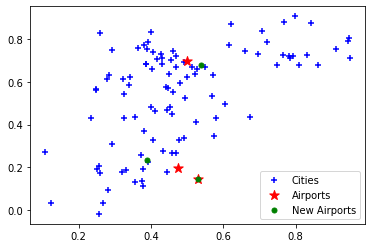

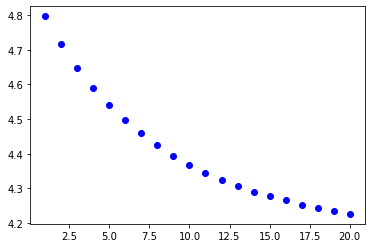

In [1]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []
closest = []
airList = []
alpha = 0.001
repetitions = 20
objectives = []
myX = []
newAirports = []

for i in range(repetitions):
    myX.append(i + 1)

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

for i in range(len(airports)):
    airList.append(airports[i][0])
    airList.append(airports[i][1])

for a in range(repetitions):
    counter = 0
    objective = 0

    for i in cities:
        currentShortest = 1
        closest.append(0)

        x = 0
        for j in range(len(airports)):
            distance = math.sqrt(((i[0] - airList[x]) ** 2) + ((i[1] - airList[x+1]) ** 2))

            if distance < currentShortest:
                currentShortest = distance
                closest[counter] = j
            x += 2
        
        j = 0
        for k in range(len(airports)):
            if closest[counter] == k:
                airList[j] -= alpha * 2 * (airList[j]- i[0])
                airList[j + 1] -= alpha * 2 * (airList[j + 1] - i[1])
                objective += ((airList[j] - i[0]) ** 2) + ((airList[j + 1] - i[1]) ** 2)
            j += 2
        
        counter += 1
    
    objectives.append(objective)

j = 0
for i in range(len(airports)):
    newAirports.append((airList[j], airList[j + 1]))
    j += 2

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
zip_newAirs = zip(*newAirports)
plt.scatter(*zip_newAirs, marker = 'o', color = 'g', s=25, label = 'New Airports')
plt.legend()
plt

figure2 = plt.figure()
plt.plot(myX, objectives, 'o', color = 'blue')
plt.show()